# Sistema de Henon-Heiles

Considere un sistema bidimensional no lineal (Henon-Heiles o similar). Resuelva las ecuaciones de movimiento y compruebe la sensibilidad a las condiciones iniciales.

Analicemos el sistema bidimensional regido por el potencial de Henon-Heiles:

\begin{equation}
V(x,y)= \frac{1}{2}\left(x^2+y^2\right)+\lambda\left(x^2y-\frac{y^3}{3}\right)
\end{equation}

El Hamiltoniano asociado al sistema es:

\begin{equation}
H=\frac{1}{2}\left(p_x^2+p_y^2\right)+\frac{1}{2}\left(x^2+y^2\right)+\lambda\left(x^2y-\frac{y^3}{3}\right)
\end{equation}

Las ecuaciones de Hamilton son entonces:

\begin{equation}
\dot x = p_x \\
\dot y = p_y \\
\dot p_x = -x-2\lambda xy \\
\dot p_y = -y - \lambda(x^2-y^2)
\end{equation}

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [19]:
def solve_system(x0,y0,px0,py0,t0,tf): 
    Y0=[x0,y0,px0,py0] #arreglo con las condiciones iniciales 
    t=np.linspace(t0,tf,1e6) #tiempo que dura la vaina

    l=1 #Parámetro lambda 

    def f(Y,t):
        x,y,px,py=Y 

        dx= px
        dpx=-x-2*l*x*y
        dy=py
        dpy=-y-l*(x**2-y**2)


        return ([dx,dy,dpx,dpy])

    sol=odeint(f,Y0,t)

    return sol,t

In [20]:
def graphs(x,y,px,py,t):
    plt.figure(1,figsize=(14,9))
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.grid(True)
    plt.plot(x,y,'.')

    plt.figure(2,figsize=(14,9))
    plt.xlabel("Velocidad x")
    plt.ylabel("Velocidad y")
    plt.grid(True)
    plt.plot(px,py,'.')
               
    plt.figure(2,figsize=(14,9))
    plt.xlabel("Tiempo")
    plt.ylabel("Eje x")
    plt.grid(True)
    plt.plot(t,x,'.')
    
    plt.figure(2,figsize=(14,9))
    plt.xlabel("Tiempo")
    plt.ylabel("Eje y")
    plt.grid(True)
    plt.plot(t,y,'.')
               
               

C:\Users\Conda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


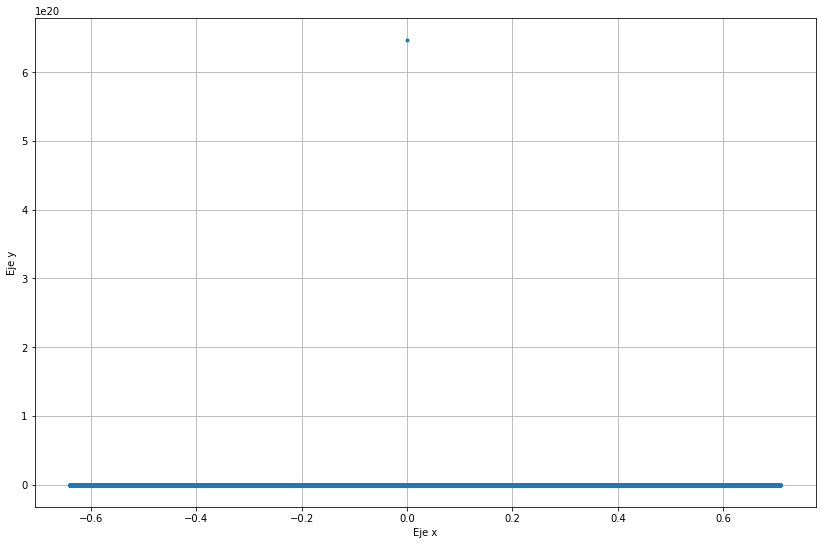

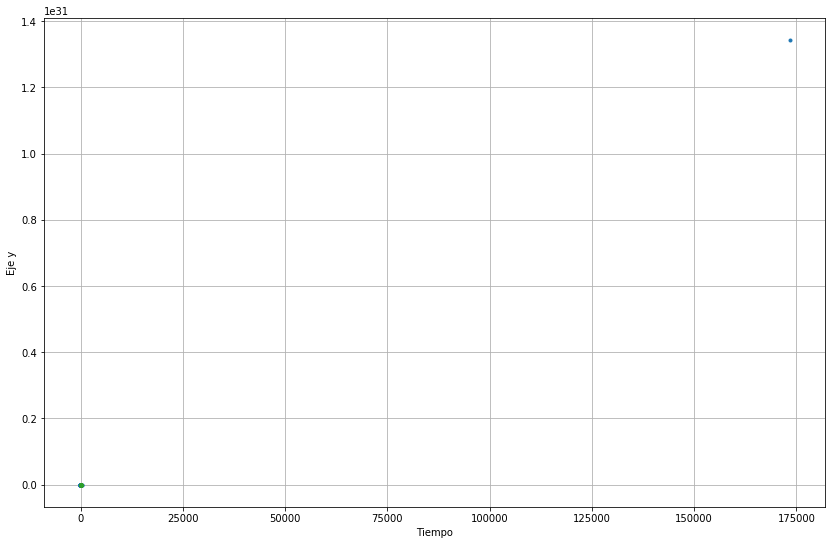

In [38]:

sol=solve_system(0,0,1,1,0,10)

var=sol[0]
t=sol[1]

graphs(var[:,0],var[:,1],var[:,2],var[:,3],t)




